In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from csv import DictReader
from datetime import datetime
from collections import defaultdict
import json
import pandas as pd
import collections

In [2]:
delay2 = []

reader = DictReader(open('DATA/delays.csv', 'rt', encoding='utf-8'))
for row in reader:
    timestamp = datetime.fromtimestamp(int(row["timestamp"])).strftime('%Y-%m-%d %H:%M')
    train_no = row["train_no"]
    train_type = row["train_type"]
    station_id = row["station_id"]
    delay_type = row["delay_type"]
    delay = row["delay"]
    delay2.append([timestamp,train_no,train_type,station_id,delay_type,delay])

delays = np.asarray(delay2)
#print(delays)

In [3]:
slovar = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    slovar[tn] += int(d)

sort = {k: v for k, v in sorted(slovar.items(), key=lambda y: y[1], reverse=True)[:10]}
df = pd.DataFrame(sort.items(), columns =['Train_no', 'delay(min)'])

df

,Train_no,delay(min)
0,212,1507863
1,158,1398049
2,502,1219703
3,499,1178623
4,503,1173924
5,415,962358
6,498,897636
7,414,863110
8,246,788474
9,1415,652435


In [4]:
node = []

reader = DictReader(open('DATA/rail_nodes.csv', 'rt', encoding='utf-8'))
for row in reader:
    id = row["id"]
    station_name = row["station_name"]
    lat = row["lat"]
    lng = row["lng"]
    
    node.append([id,station_name,lat,lng])

nodes = np.asarray(node)
print(nodes)

[['42200' 'Zidani Most' '46.08546111' '15.17064444']
 ['43001' 'Rimske Toplice' '46.12351944' '15.20292222']
 ['43002' 'Laško' '46.15453611' '15.23225833']
 ...
 ['44356' 'Črnotiče' '45.55213888' '13.89161388']
 ['44300' 'Prešnica' '45.57048333' '13.94099722']
 ['03317' 'Trst/Trieste Centrale (I)' '45.6577528' '13.7719334']]


In [5]:
schedule = json.load(open('DATA/train_schedule.json', encoding="utf8"))
scheduleDf = pd.DataFrame(schedule["2924"]) 

scheduleDf 

,train_type,train_stations
0,LPV,"{'id': '42200', 'arr': None, 'dep': '19:02'}"
1,LPV,"{'id': '43001', 'arr': '19:10', 'dep': '19:10'}"
2,LPV,"{'id': '43002', 'arr': '19:16', 'dep': '19:17'}"
3,LPV,"{'id': '43100', 'arr': '19:25', 'dep': '19:27'}"
4,LPV,"{'id': '43101', 'arr': '19:31', 'dep': '19:31'}"
5,LPV,"{'id': '43102', 'arr': '19:35', 'dep': '19:36'}"
6,LPV,"{'id': '43200', 'arr': '19:39', 'dep': '19:40'}"
7,LPV,"{'id': '43201', 'arr': '19:43', 'dep': '19:44'}"
8,LPV,"{'id': '43205', 'arr': '19:48', 'dep': '19:48'}"
9,LPV,"{'id': '43202', 'arr': '19:51', 'dep': '19:51'}"


In [6]:
seznam = []
with open('DATA/train_schedule.json') as f:
    data = json.load(f)
    df=pd.DataFrame(data)
for x in df:
    print(df[x])

train_type                                                      LPV
train_stations    [{'id': '42200', 'arr': None, 'dep': '19:02'},...
Name: 2924, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43453', 'arr': '09:07', 'dep': '09:08...
Name: 4447, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '04:55'},...
Name: 4487, dtype: object
train_type                                                       EN
train_stations    [{'id': '42001', 'arr': '21:51', 'dep': '22:06...
Name: 498, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '12:08'},...
Name: 2262, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '05:53'},...
Name: 4100, dtype: object
train_type                   

Name: 3712, dtype: object
train_type                                                       LP
train_stations    [{'id': '42700', 'arr': None, 'dep': '05:40'},...
Name: 3386, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '09:12'},...
Name: 2256, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '14:34'},...
Name: 3219, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44903', 'arr': None, 'dep': '19:52'},...
Name: 2714, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '17:20'},...
Name: 2921, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42400', 'arr': None, 'dep': '19:25'},...
Name: 2423, dtype: object
tr

Name: 3509, dtype: object
train_type                                                       LP
train_stations    [{'id': '42502', 'arr': None, 'dep': '20:40'},...
Name: 3224, dtype: object
train_type                                                       LP
train_stations    [{'id': '42400', 'arr': None, 'dep': '09:44'},...
Name: 4229, dtype: object
train_type                                                       RG
train_stations    [{'id': '43704', 'arr': None, 'dep': '18:30'},...
Name: 1643, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '07:38'},...
Name: 2201, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '16:55'},...
Name: 2275, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43777', 'arr': None, 'dep': '16:15'},...
Name: 2511, dtype: object
tr

Name: 3155, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '13:10'},...
Name: 2264, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42307', 'arr': None, 'dep': '07:34'},...
Name: 2445, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '15:36'},...
Name: 3703, dtype: object
train_type                                                       LP
train_stations    [{'id': '43854', 'arr': None, 'dep': '12:21'},...
Name: 3610, dtype: object
train_type                                                      AVT
train_stations    [{'id': '44712', 'arr': None, 'dep': '21:16'},...
Name: 861, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44001', 'arr': None, 'dep': '08:24'},...
Name: 1804, dtype: object
tra

Name: 3180, dtype: object
train_type                                                       IC
train_stations    [{'id': '43777', 'arr': None, 'dep': '05:53'},...
Name: 503, dtype: object
train_type                                                       EC
train_stations    [{'id': '42001', 'arr': '13:04', 'dep': '13:39...
Name: 210, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '08:40'},...
Name: 3895, dtype: object
train_type                                                       LP
train_stations    [{'id': '43854', 'arr': None, 'dep': '18:25'},...
Name: 3600, dtype: object
train_type                                                       LP
train_stations    [{'id': '42514', 'arr': None, 'dep': '15:26'},...
Name: 3384, dtype: object
train_type                                                       LP
train_stations    [{'id': '43400', 'arr': None, 'dep': '14:55'},...
Name: 3489, dtype: object
trai

train_type                                                      LPV
train_stations    [{'id': '44500', 'arr': None, 'dep': '16:48'},...
Name: 2615, dtype: object
train_type                                                       LP
train_stations    [{'id': '43400', 'arr': None, 'dep': '13:40'},...
Name: 4092, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42307', 'arr': None, 'dep': '11:10'},...
Name: 2449, dtype: object
train_type                                                       MV
train_stations    [{'id': '42300', 'arr': None, 'dep': '09:25'},...
Name: 247, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '05:25'},...
Name: 2211, dtype: object
train_type                                                       LP
train_stations    [{'id': '44500', 'arr': None, 'dep': '06:26'},...
Name: 4208, dtype: object
train_type                   

train_type                                                       LP
train_stations    [{'id': '44500', 'arr': None, 'dep': '10:10'},...
Name: 4210, dtype: object
train_type                                                       LP
train_stations    [{'id': '44500', 'arr': None, 'dep': '21:41'},...
Name: 4286, dtype: object
train_type                                                       LP
train_stations    [{'id': '43502', 'arr': '17:31', 'dep': '17:32...
Name: 4469, dtype: object
train_type                                                       RG
train_stations    [{'id': '44352', 'arr': None, 'dep': '20:18'},...
Name: 1604, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '19:33'},...
Name: 3299, dtype: object
train_type                                                       EC
train_stations    [{'id': '42400', 'arr': '17:30', 'dep': '17:39...
Name: 213, dtype: object
train_type                   

Name: 3205, dtype: object
train_type                                                       LP
train_stations    [{'id': '42505', 'arr': None, 'dep': '05:58'},...
Name: 3206, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '14:27'},...
Name: 2480, dtype: object
train_type                                                       IC
train_stations    [{'id': '43400', 'arr': None, 'dep': '20:05'},...
Name: 523, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44001', 'arr': None, 'dep': '17:12'},...
Name: 2660, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '15:25'},...
Name: 2917, dtype: object
train_type                                                      LPV
train_stations    [{'id': '03466', 'arr': None, 'dep': '13:28'},...
Name: 1805, dtype: object
tra

Name: 3590, dtype: object
train_type                                                      AVT
train_stations    [{'id': '44712', 'arr': None, 'dep': '11:37'},...
Name: 855, dtype: object
train_type                                                       LP
train_stations    [{'id': '43804', 'arr': None, 'dep': '08:35'},...
Name: 3708, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '19:57'},...
Name: 3516, dtype: object
train_type                                                       LP
train_stations    [{'id': '42352', 'arr': None, 'dep': '16:12'},...
Name: 3123, dtype: object
train_type                                                       LP
train_stations    [{'id': '43910', 'arr': None, 'dep': '22:15'},...
Name: 3519, dtype: object
train_type                                                       LP
train_stations    [{'id': '43503', 'arr': '05:37', 'dep': '05:37...
Name: 4459, dtype: object
tra

Name: 3194, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '04:28'},...
Name: 2001, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '17:15'},...
Name: 3184, dtype: object
train_type                                                       LP
train_stations    [{'id': '43806', 'arr': '10:56', 'dep': '10:59...
Name: 7808, dtype: object
train_type                                                      LPV
train_stations    [{'id': '03466', 'arr': None, 'dep': '21:58'},...
Name: 1811, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '05:31'},...
Name: 3502, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '18:35'},...
Name: 3520, dtype: object
tr

Name: 3222, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '20:48'},...
Name: 3287, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '01:15'},...
Name: 2007, dtype: object
train_type                                                       LP
train_stations    [{'id': '42501', 'arr': None, 'dep': '06:02'},...
Name: 3232, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '12:55'},...
Name: 2983, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42200', 'arr': None, 'dep': '08:05'},...
Name: 2906, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '04:47'},...
Name: 3828, dtype: object
tr

In [7]:
with open('DATA/train_schedule.json') as json_file:
    data = json.load(json_file)
for x in data:
    print(x)
    print(data[x])

2924
{'train_type': 'LPV', 'train_stations': [{'id': '42200', 'arr': None, 'dep': '19:02'}, {'id': '43001', 'arr': '19:10', 'dep': '19:10'}, {'id': '43002', 'arr': '19:16', 'dep': '19:17'}, {'id': '43100', 'arr': '19:25', 'dep': '19:27'}, {'id': '43101', 'arr': '19:31', 'dep': '19:31'}, {'id': '43102', 'arr': '19:35', 'dep': '19:36'}, {'id': '43200', 'arr': '19:39', 'dep': '19:40'}, {'id': '43201', 'arr': '19:43', 'dep': '19:44'}, {'id': '43205', 'arr': '19:48', 'dep': '19:48'}, {'id': '43202', 'arr': '19:51', 'dep': '19:51'}, {'id': '43203', 'arr': '19:57', 'dep': '19:58'}, {'id': '43204', 'arr': '20:04', 'dep': '20:05'}, {'id': '43300', 'arr': '20:09', 'dep': '20:10'}, {'id': '43301', 'arr': '20:14', 'dep': '20:15'}, {'id': '43302', 'arr': '20:17', 'dep': '20:17'}, {'id': '43303', 'arr': '20:19', 'dep': '20:20'}, {'id': '43304', 'arr': '20:24', 'dep': '20:24'}, {'id': '43400', 'arr': '20:27', 'dep': None}]}
4447
{'train_type': 'LPV', 'train_stations': [{'id': '43453', 'arr': '09:07',

{'train_type': 'LPV', 'train_stations': [{'id': '42300', 'arr': None, 'dep': '18:53'}, {'id': '42212', 'arr': '18:58', 'dep': '18:58'}, {'id': '42222', 'arr': '19:01', 'dep': '19:02'}, {'id': '42210', 'arr': '19:08', 'dep': '19:09'}, {'id': '42209', 'arr': '19:12', 'dep': '19:12'}, {'id': '42208', 'arr': '19:16', 'dep': '19:17'}, {'id': '42207', 'arr': '19:22', 'dep': '19:23'}, {'id': '42206', 'arr': '19:28', 'dep': '19:29'}, {'id': '42204', 'arr': '19:36', 'dep': '19:37'}, {'id': '42203', 'arr': '19:41', 'dep': '19:42'}, {'id': '42201', 'arr': '19:46', 'dep': '19:47'}, {'id': '42200', 'arr': '19:55', 'dep': '20:00'}, {'id': '42103', 'arr': '20:03', 'dep': '20:04'}, {'id': '42102', 'arr': '20:06', 'dep': '20:06'}, {'id': '42101', 'arr': '20:09', 'dep': '20:10'}, {'id': '42100', 'arr': '20:17', 'dep': '20:18'}, {'id': '42006', 'arr': '20:24', 'dep': '20:24'}, {'id': '42005', 'arr': '20:28', 'dep': '20:29'}, {'id': '42004', 'arr': '20:32', 'dep': '20:33'}, {'id': '42003', 'arr': '20:36',

480
{'train_type': 'MV', 'train_stations': [{'id': '44903', 'arr': '21:59', 'dep': '22:14'}, {'id': '44100', 'arr': '22:29', 'dep': '22:30'}, {'id': '44009', 'arr': '22:42', 'dep': '22:43'}, {'id': '44004', 'arr': '23:20', 'dep': '23:21'}, {'id': '42300', 'arr': '23:40', 'dep': None}]}
3370
{'train_type': 'LP', 'train_stations': [{'id': '42700', 'arr': None, 'dep': '04:05'}, {'id': '42909', 'arr': '04:07', 'dep': '04:07'}, {'id': '42908', 'arr': '04:12', 'dep': '04:12'}, {'id': '42907', 'arr': '04:15', 'dep': '04:16'}, {'id': '42906', 'arr': '04:19', 'dep': '04:19'}, {'id': '42905', 'arr': '04:22', 'dep': '04:22'}, {'id': '42904', 'arr': '04:26', 'dep': '04:26'}, {'id': '42903', 'arr': '04:29', 'dep': '04:30'}, {'id': '42902', 'arr': '04:36', 'dep': '04:36'}, {'id': '42901', 'arr': '04:42', 'dep': '04:42'}, {'id': '42100', 'arr': '04:45', 'dep': None}]}
1259
{'train_type': 'EC', 'train_stations': [{'id': '43400', 'arr': '19:37', 'dep': '19:45'}, {'id': '43300', 'arr': '19:58', 'dep': '

In [8]:
df

,2924,4447,4487,498,2262,4100,7807,3171,7812,4455,...,2426,3831,3615,2258,2982,2608,2451,640,517,4255
train_type,LPV,LPV,LP,EN,LPV,LP,MO,LP,LP,LPV,...,LPV,LP,LP,LPV,LPV,LPV,LPV,RG,IC,LP
train_stations,"[{'id': '42200', 'arr': None, 'dep': '19:02'},...","[{'id': '43453', 'arr': '09:07', 'dep': '09:08...","[{'id': '42300', 'arr': None, 'dep': '04:55'},...","[{'id': '42001', 'arr': '21:51', 'dep': '22:06...","[{'id': '42001', 'arr': None, 'dep': '12:08'},...","[{'id': '43600', 'arr': None, 'dep': '05:53'},...","[{'id': '43652', 'arr': '18:28', 'dep': '18:30...","[{'id': '42356', 'arr': None, 'dep': '08:18'},...","[{'id': '43806', 'arr': '17:36', 'dep': '17:39...","[{'id': '43453', 'arr': '20:31', 'dep': '20:32...",...,"[{'id': '42300', 'arr': None, 'dep': '20:43'},...","[{'id': '43652', 'arr': None, 'dep': '16:20'},...","[{'id': '43800', 'arr': None, 'dep': '15:11'},...","[{'id': '42001', 'arr': None, 'dep': '10:10'},...","[{'id': '43203', 'arr': None, 'dep': '07:30'},...","[{'id': '44200', 'arr': None, 'dep': '16:21'},...","[{'id': '42307', 'arr': None, 'dep': '14:41'},...","[{'id': '43400', 'arr': None, 'dep': '09:20'},...","[{'id': '43400', 'arr': None, 'dep': '10:50'},...","[{'id': '44700', 'arr': None, 'dep': '13:50'},..."


In [9]:
ts_delays = defaultdict(lambda: 0)
ts_delays_d = defaultdict(lambda: 0)
ts_delays_a = defaultdict(lambda: 0)
ts_delays_e = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    month = ts[5:7]
    if (int(d) > 0):
        ts_delays[month] += 1
        if (dt == "D"):
            ts_delays_d[month] += 1
        if (dt == "A"):
            ts_delays_a[month] += 1
        if (dt == "E"):
            ts_delays_e[month] += 1
        
#sort_ts_delays = {k: v for k, v in sorted(ts_delays.items(), key=lambda y: y[1], reverse=True)}

sort_ts_delays = collections.OrderedDict(sorted(ts_delays.items()))
sort_ts_delays_d = collections.OrderedDict(sorted(ts_delays_d.items()))
sort_ts_delays_a = collections.OrderedDict(sorted(ts_delays_a.items()))
sort_ts_delays_e = collections.OrderedDict(sorted(ts_delays_e.items()))

print(sort_ts_delays)
print(sort_ts_delays_d)
print(sort_ts_delays_a)
print(sort_ts_delays_e)

OrderedDict([('01', 127981), ('02', 191807), ('03', 214360), ('04', 131746), ('05', 188547), ('06', 299790), ('07', 381954), ('08', 571976), ('09', 559691), ('10', 418218), ('11', 56966), ('12', 57038)])
OrderedDict([('01', 112668), ('02', 167231), ('03', 185009), ('04', 107274), ('05', 160974), ('06', 249189), ('07', 317151), ('08', 469621), ('09', 471696), ('10', 348671), ('11', 47541), ('12', 49800)])
OrderedDict([('01', 7569), ('02', 11755), ('03', 15328), ('04', 9636), ('05', 13625), ('06', 17727), ('07', 33143), ('08', 45379), ('09', 44420), ('10', 26396), ('11', 4916), ('12', 5261)])
OrderedDict([('01', 7744), ('02', 12821), ('03', 14023), ('04', 14836), ('05', 13948), ('06', 32874), ('07', 31660), ('08', 56976), ('09', 43575), ('10', 43151), ('11', 4509), ('12', 1977)])


Text(0, 0.5, 'Delays')

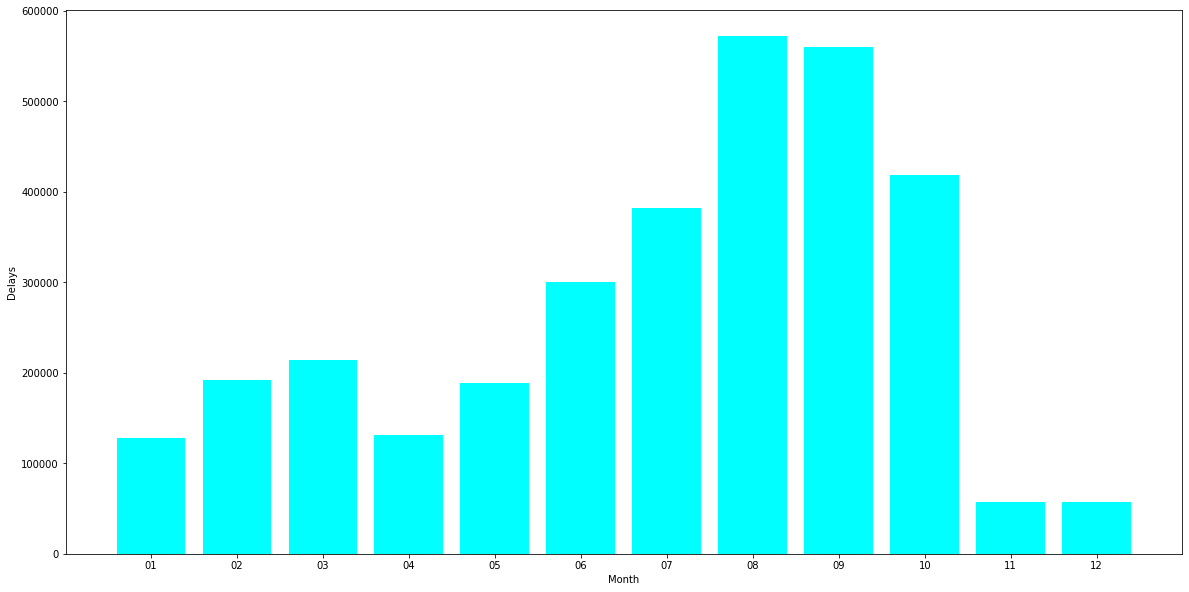

In [10]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays.keys(), sort_ts_delays.values(),color="cyan")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

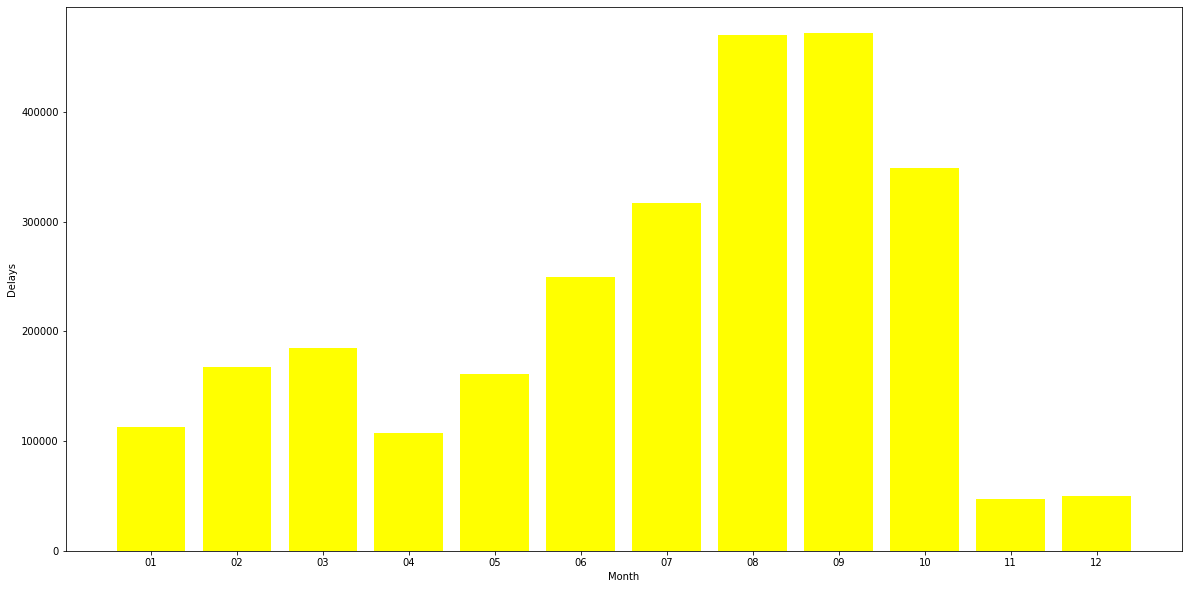

In [11]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_d.keys(), sort_ts_delays_d.values(),color="yellow")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

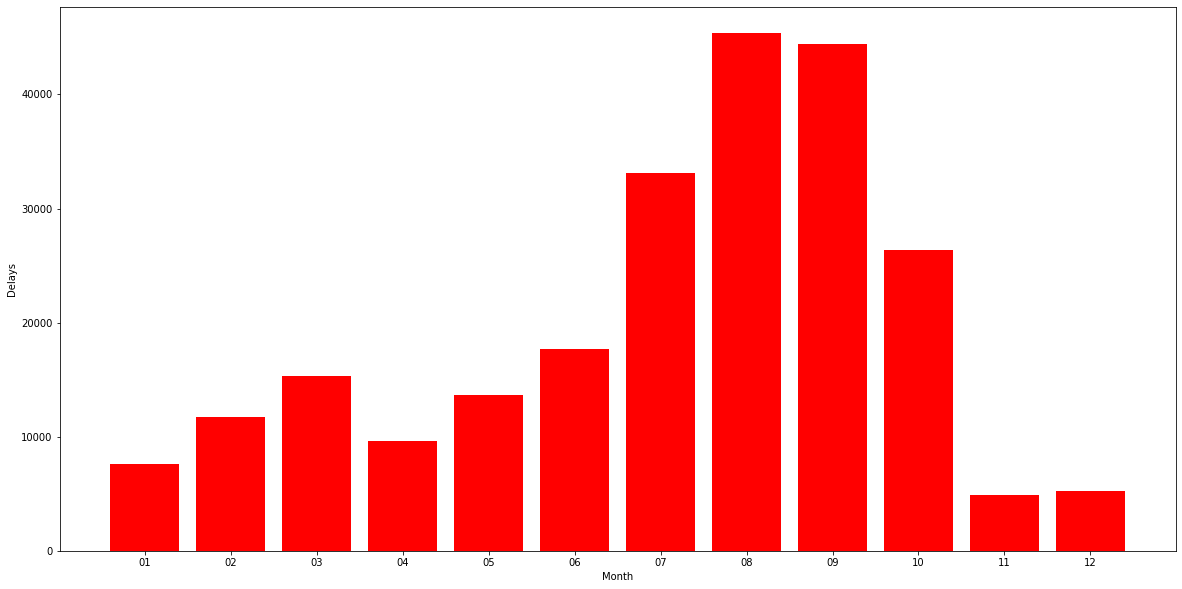

In [12]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_a.keys(), sort_ts_delays_a.values(),color="red")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

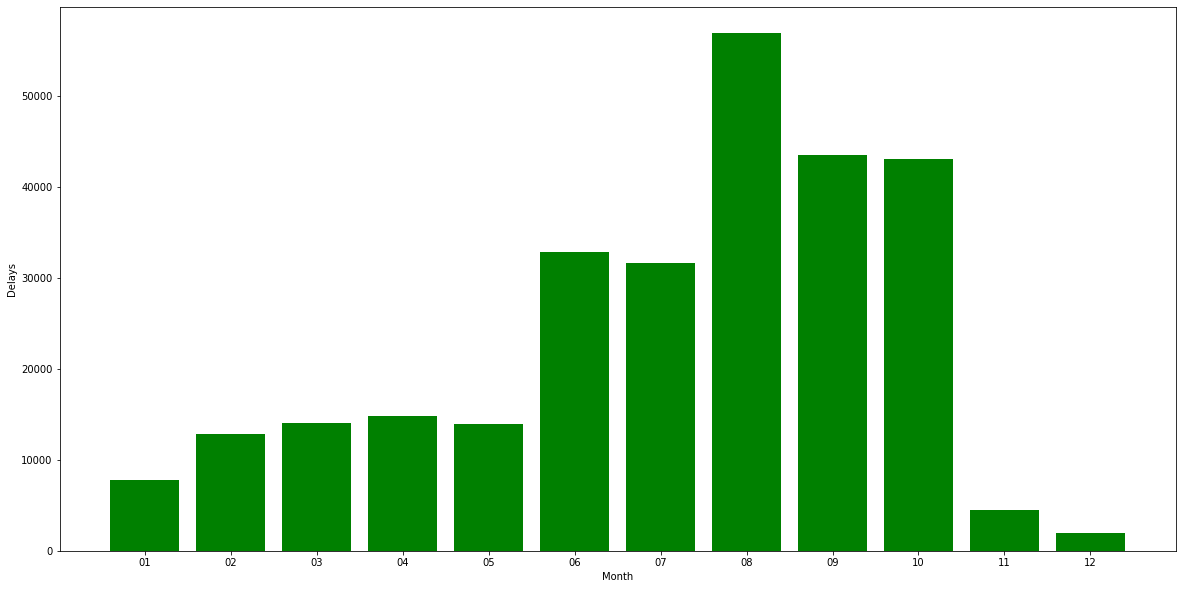

In [13]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_e.keys(), sort_ts_delays_e.values(),color="green")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

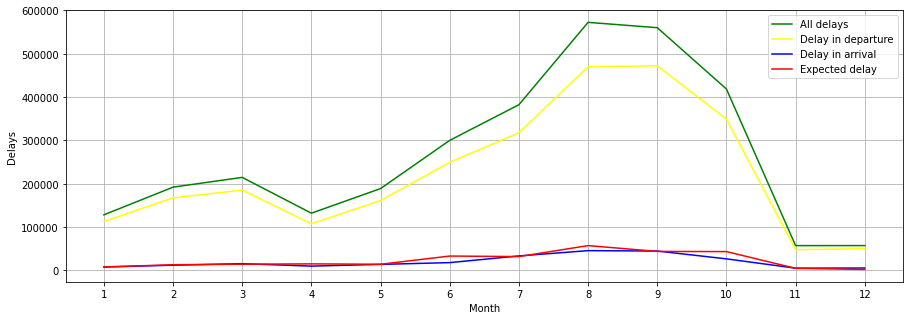

In [15]:
plt.figure(figsize=(15, 5))
plt.grid()
tsk = list(sort_ts_delays.keys())
tsk2 = []
for i in tsk:
    tsk2.append(int(i))
tsv = list(sort_ts_delays.values())
plt.xticks(tsk2)
plt.plot(tsk2, tsv, label = "All delays", color = "green")
plt.legend(loc = "upper right")

tsk_d = list(sort_ts_delays_d.keys())
tsk_d2 = []
for i in tsk_d:
    tsk_d2.append(int(i))
tsv_d = list(sort_ts_delays_d.values())
plt.xticks(tsk_d2)
plt.plot(tsk_d2, tsv_d, label = "Delay in departure", color = "yellow")
plt.legend(loc = "upper right")

tsk_a = list(sort_ts_delays_a.keys())
tsk_a2 = []
for i in tsk_a:
    tsk_a2.append(int(i))
tsv_a = list(sort_ts_delays_a.values())
plt.xticks(tsk_a2)
plt.plot(tsk_a2, tsv_a, label = "Delay in arrival", color = "blue")
plt.legend(loc = "upper right")

tsk_e = list(sort_ts_delays_e.keys())
tsk_e2 = []
for i in tsk_e:
    tsk_e2.append(int(i))
tsv_e = list(sort_ts_delays_e.values())
plt.xticks(tsk_e2)
plt.plot(tsk_e2, tsv_e, label = "Expected delay", color = "red")
plt.legend(loc = "upper right")



plt.xlabel("Month")
plt.ylabel("Delays")
